In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Exploring and Analyzing Text Data Assignment 

In [3]:
!pip install wordcloud

<IPython.core.display.Javascript object>

In [10]:
import spacy
import requests
import string
import pandas as pd
from nltk import pos_tag
from nltk.text import Text
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup

!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


<IPython.core.display.Javascript object>

### Read the CNN Lite plain text file articles into a corpus using the NLTK's PlaintextCorpusReader.

In [5]:
articles = [
    "http://lite.cnn.io/en/article/h_eac18760a7a7f9a1bf33616f1c4a336d",
    "http://lite.cnn.io/en/article/h_de3f82f17d289680dd2b47c6413ebe7c",
    "http://lite.cnn.io/en/article/h_72f4dc9d6f35458a89af014b62e625ad",
    "http://lite.cnn.io/en/article/h_aa21fe6bf176071cb49e09d422c3adf0",
    "http://lite.cnn.io/en/article/h_8ad34a532921c9076cdc9d7390d2f1bc",
    "http://lite.cnn.io/en/article/h_84422c79110d9989177cfaf1c5f45fe7",
    "http://lite.cnn.io/en/article/h_d010d9580abac3a44c6181ec6fb63d58",
    "http://lite.cnn.io/en/article/h_fb11f4e9d7c5323e75b337d9e9e5e368",
    "http://lite.cnn.io/en/article/h_7b27f0b131067f8ece6238ac559670ab",
    "http://lite.cnn.io/en/article/h_8cae7f735fa9573d470f802063ceffe2",
    "http://lite.cnn.io/en/article/h_72c3668280e82576fcc2602b0fa70c14",
    "http://lite.cnn.io/en/article/h_d20658fb0e20212051cda0e0a7248c8a",
    "http://lite.cnn.io/en/article/h_56611c43d7928120d2ae21666ccc7417",
    "http://lite.cnn.io/en/article/h_bda0394e3c5ee7054ee65c022bca7695",
]

<IPython.core.display.Javascript object>

In [6]:
def html_to_text(html):
    TAGS = ["h1", "h2", "h3", "h4", "h5", "h6", "h7", "p", "li"]

    soup = BeautifulSoup(html, "lxml")
    text_list = [tag.get_text() for tag in soup.find_all(TAGS)]
    text = " ".join(text_list)
    return text

<IPython.core.display.Javascript object>

In [11]:
path = "./news_articles/"

for index, url in enumerate(articles):
    response = requests.get(url)
    html = response.text
    text = html_to_text(html)

    with open(path + "article_" + str(index) + ".txt", "wb") as f:
        f.write(text.encode())

DOC_PATTERN = r".*\.txt"
news_corpus = PlaintextCorpusReader("news_articles", DOC_PATTERN)

<IPython.core.display.Javascript object>

In [12]:
def corpus_stats(corpus):
    print("Corpus Statistics")
    print("Number of documents: " + str(len(corpus.fileids())))
    print("Number of paragraphs: " + str(len(corpus.paras())))
    print("Number of sentences: " + str(len(corpus.sents())))
    print("Number of words: " + str(len(corpus.words())))
    print("Vocabulary: " + str(len(set(w.lower() for w in corpus.words()))))
    print(
        "Avg chars per word: " + str(round(len(corpus.raw()) / len(corpus.words()), 1))
    )
    print(
        "Avg words per sentence: "
        + str(round(len(corpus.words()) / len(corpus.sents()), 1))
    )


corpus_stats(news_corpus)

Corpus Statistics
Number of documents: 14
Number of paragraphs: 14
Number of sentences: 590
Number of words: 14159
Vocabulary: 2914
Avg chars per word: 5.0
Avg words per sentence: 24.0


<IPython.core.display.Javascript object>

### Iterate through the fileids in the corpus, extract the raw text of each document, and store them in a list.

In [13]:
docs = [news_corpus.raw(file_id) for file_id in news_corpus.fileids()]

<IPython.core.display.Javascript object>

### Write a function that calculates the following statistics for a document and returns them as a list.

- Number of sentences
- Number of tokens
- Number of words (no stop words or punctuation)
- Number of unique words (vocabulary)
- Number of unique named entities (excluding numbers, dates, times, and currency types)
- Average sentence length
- Average word length
- Lexical diversity

In [15]:
def text_stats(doc):
    sents = sent_tokenize(doc)
    tokens = word_tokenize(doc)
    words = [token.lower() for token in tokens 
             if not token.lower() in stopwords.words('english')
             if not token in string.punctuation]

    num_sents = len(sents)
    num_tokens = len(tokens)
    num_words = len(words)
    vocab = len(set(words))
    characters = sum([len(word) for word in words])
    
    spacy_doc = nlp(doc)
    remove = ['DATE', 'TIME', 'PERCENT', 'MONEY', 'QUANTITY', 
              'ORDINAL', 'CARDINAL']
    entities = [entity.text for entity in spacy_doc.ents 
                if not entity.label_ in remove]

    num_entities = len(set(entities))
    words_sent = num_words / num_sents
    char_word = characters / num_words
    lex_div = vocab / num_words
    
    stats = [num_sents, num_tokens, num_words, vocab, num_entities, 
             words_sent, char_word, lex_div]

    return stats


<IPython.core.display.Javascript object>

### Iterate through all the documents, calculate these statistics for each one, and store all the results in a Pandas data frame.

In [19]:
stat_list = []
for doc in docs:
    stat_list.append(text_stats(doc))

<IPython.core.display.Javascript object>

In [20]:
stat_df = pd.DataFrame(
    stat_list,
    columns=[
        "Num Sentence",
        "Num Tokens",
        "Num Words",
        " Num Unique Words",
        "Num Unique Entities",
        " Avg Sentence Length",
        "Avg Word Length",
        "Lexical Diversity",
    ],
)

<IPython.core.display.Javascript object>

### Summarize these statistics for the entire corpus by calling the Pandas `describe` method.

In [23]:
stat_df.describe()

,Num Sentence,Num Tokens,Num Words,Num Unique Words,Num Unique Entities,Avg Sentence Length,Avg Word Length,Lexical Diversity
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,42.142857,982.571429,530.571429,322.428571,38.357143,12.599652,5.890374,0.639820
std,25.267362,568.731208,312.200063,164.726213,22.551163,1.545393,0.478262,0.068511
min,12.000000,264.000000,143.000000,107.000000,13.000000,10.913793,5.191083,0.493897
25%,23.500000,585.250000,304.750000,193.750000,20.500000,11.345497,5.518404,0.616477
50%,42.000000,966.500000,516.500000,320.000000,33.500000,12.040816,5.796935,0.630355
75%,55.750000,1290.750000,687.000000,433.000000,41.750000,13.509527,6.217780,0.683577
max,92.000000,2068.000000,1080.000000,597.000000,83.000000,15.666667,6.807416,0.748252


<IPython.core.display.Javascript object>

### Choose a document from the list of documents you created earlier and generate a frequency distribution bar chart for it showing which terms appear most frequently in the text.

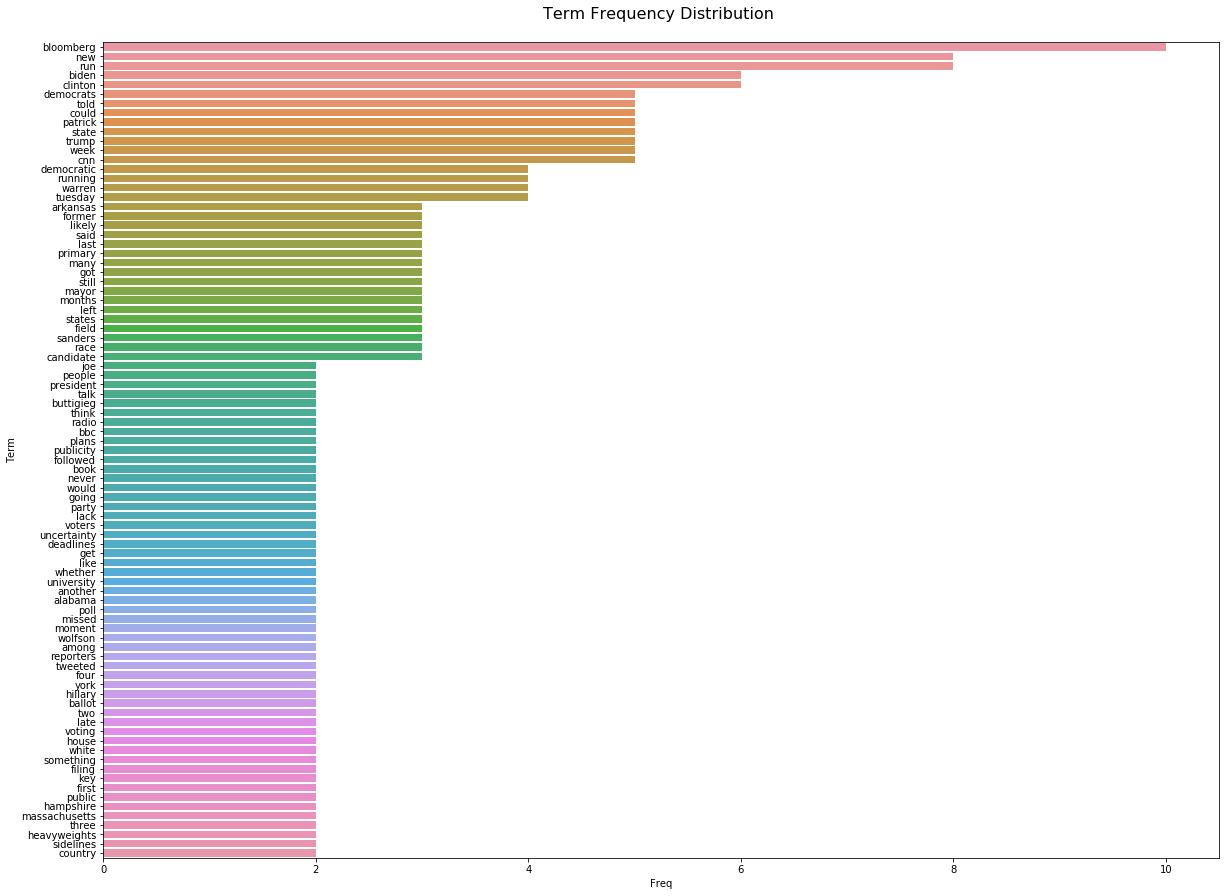

<IPython.core.display.Javascript object>

In [28]:
cleaned = [
    token.lower()
    for token in word_tokenize(docs[3])
    if not token.lower() in stopwords.words("english")
    if token.isalpha() == True
]

fdist = FreqDist(cleaned)
fdist_df = pd.DataFrame.from_dict(fdist, orient="index").reset_index()
fdist_df.columns = ["Term", "Freq"]
ordered = fdist_df.sort_values("Freq", ascending=False)
filtered = ordered[ordered["Freq"] > 1]

plt.figure(figsize=(20, 15))
sns.barplot(data=filtered, x="Freq", y="Term")
plt.title("Term Frequency Distribution \n", fontsize=16)
plt.show()

### Generate a word cloud visualization for the same document for which you generated the frequency distribution.

In [29]:
def word_cloud(text, colormap="tab10", background_color="white"):
    cloud = WordCloud(
        width=1600,
        height=800,
        stopwords=STOPWORDS,
        colormap=colormap,
        background_color=background_color,
    ).generate(text)

    plt.figure(figsize=(12, 10))
    plt.imshow(cloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

<IPython.core.display.Javascript object>

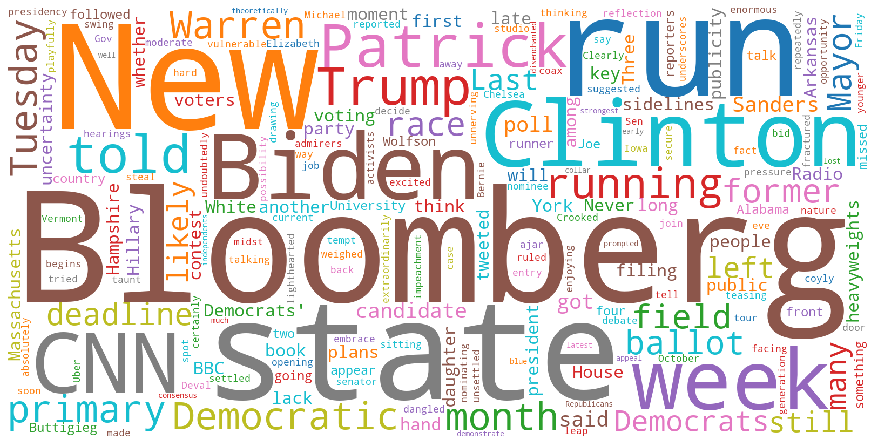

<IPython.core.display.Javascript object>

In [30]:
word_cloud(docs[3])

### Choose a different article (preferably one that references several named entities) and create a dispersion plot that shows the occurrence of those entities throughout the document.

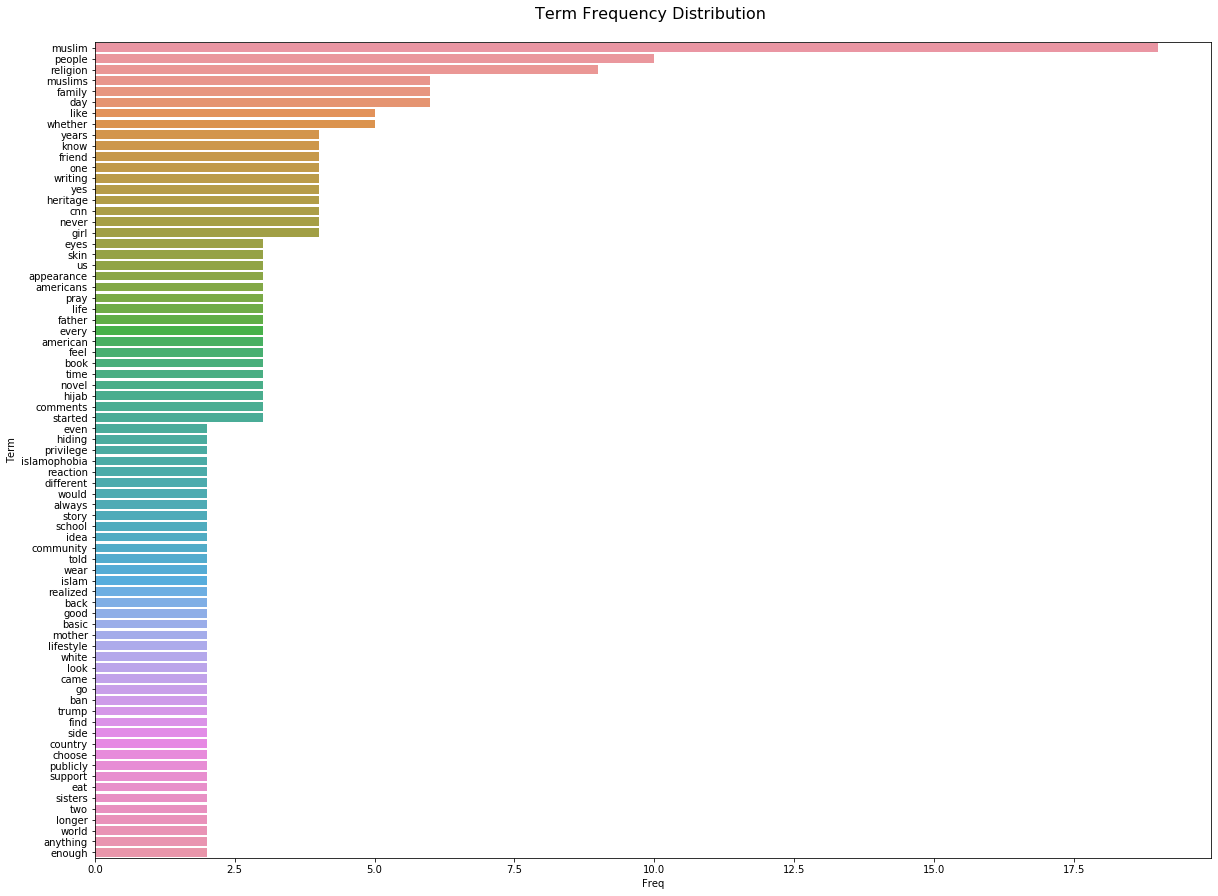

<IPython.core.display.Javascript object>

In [31]:
cleaned = [
    token.lower()
    for token in word_tokenize(docs[5])
    if not token.lower() in stopwords.words("english")
    if token.isalpha() == True
]

fdist = FreqDist(cleaned)
fdist_df = pd.DataFrame.from_dict(fdist, orient="index").reset_index()
fdist_df.columns = ["Term", "Freq"]
ordered = fdist_df.sort_values("Freq", ascending=False)
filtered = ordered[ordered["Freq"] > 1]

plt.figure(figsize=(20, 15))
sns.barplot(data=filtered, x="Freq", y="Term")
plt.title("Term Frequency Distribution \n", fontsize=16)
plt.show()

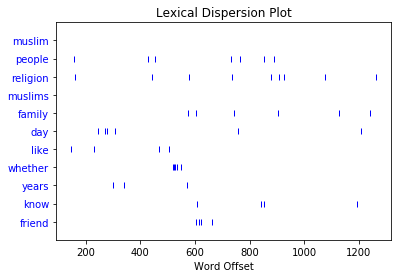

<IPython.core.display.Javascript object>

In [32]:
tokenized = word_tokenize(docs[5])
figures = [
    "muslim",
    "people",
    "religion",
    "muslims",
    "family",
    "day",
    "like",
    "whether",
    "years",
    "know",
    "friend",
]
Text(tokenized).dispersion_plot(figures)

### Choose another article and generate a POS visualization highlighting the parts of speech for tokens in the article.

In [33]:
from yellowbrick.text.postag import PosTagVisualizer

C:\Users\jlim7\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


<IPython.core.display.Javascript object>

In [40]:
tokens = word_tokenize(docs[9])
tagged = pos_tag(tokens)

visualizer = PosTagVisualizer()
visualizer.transform(tagged)

[('Alicia', 'NNP'),
 ('Keys', 'NNP'),
 ('will', 'MD'),
 ('return', 'VB'),
 ('as', 'IN'),
 ('host', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Grammy', 'NNP'),
 ('Awards', 'NNP'),
 ('in', 'IN'),
 ('2020', 'CD'),
 ('(', '('),
 ('CNN', 'NNP'),
 (')', ')'),
 ('-', ':'),
 ('Alicia', 'NNP'),
 ('Keys', 'NNP'),
 ('is', 'VBZ'),
 ('hosting', 'VBG'),
 ('the', 'DT'),
 ('Grammy', 'NNP'),
 ('Awards', 'NNP'),
 ('again', 'RB'),
 ('next', 'JJ'),
 ('year', 'NN'),
 ('.', '.'),
 ('Her', 'PRP$'),
 ('2020', 'CD'),
 ('return', 'NN'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('62nd', 'CD'),
 ('Annual', 'NNP'),
 ('Grammys', 'NNP'),
 ('puts', 'VBZ'),
 ('her', 'PRP$'),
 ('in', 'IN'),
 ('rare', 'JJ'),
 ('company', 'NN'),
 ('after', 'IN'),
 ('she', 'PRP'),
 ('became', 'VBD'),
 ('the', 'DT'),
 ('first', 'JJ'),
 ('female', 'NN'),
 ('to', 'TO'),
 ('host', 'VB'),
 ('the', 'DT'),
 ('awards', 'NNS'),
 ('in', 'IN'),
 ('14', 'CD'),
 ('years', 'NNS'),
 ('.', '.'),
 ('Before', 'IN'),
 ('that', 'DT'),
 (',', ','),
 ('the', 'DT'),
 ('l

<IPython.core.display.Javascript object>

In [41]:
print(" ".join((visualizer.color) for color, token in visualizer.tagged))

AttributeError: 'PosTagVisualizer' object has no attribute 'tagged'

<IPython.core.display.Javascript object>